# Heart Disease
### Import __[data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)__

#### Import necessary libraries

In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
#from sklearn_pandas import DataFrameMapper

In [3]:
data = pd.read_csv('Dropbox/CG/Kaggle/heart.csv')

#### Check basic dataframe information: Columns, data types, number of samples

In [245]:
data.shape

(303, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### There are no null values. 
#### Check for duplicate entries. 

In [247]:
data[data.duplicated().values]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### Remove the duplicate

In [248]:
data.drop_duplicates(inplace=True)

In [253]:
data.shape

(302, 14)

#### Check summary statistics to get idea of feature scales and deviation

In [254]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Show data distribution and check for outliers
#### - Possible outliers in chol (564), and oldpeak (6.2)

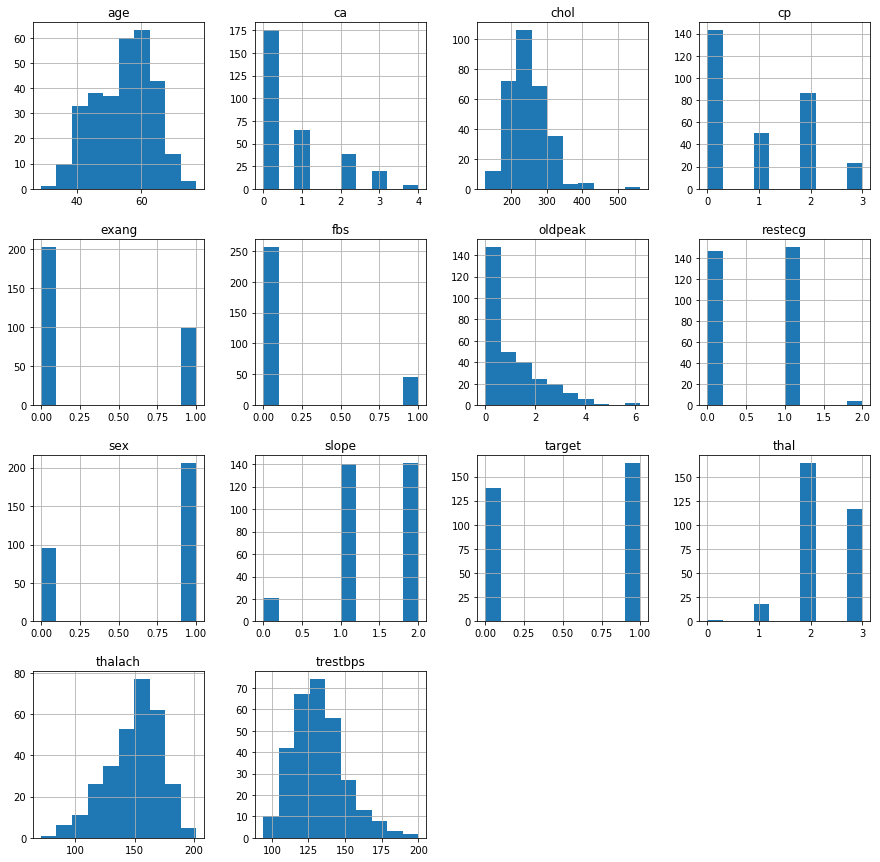

In [256]:
data.hist(figsize = (15,15));

In [257]:
raw_corr = data.corr()

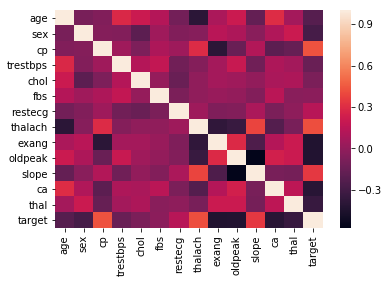

In [258]:
ax = sns.heatmap(raw_corr)

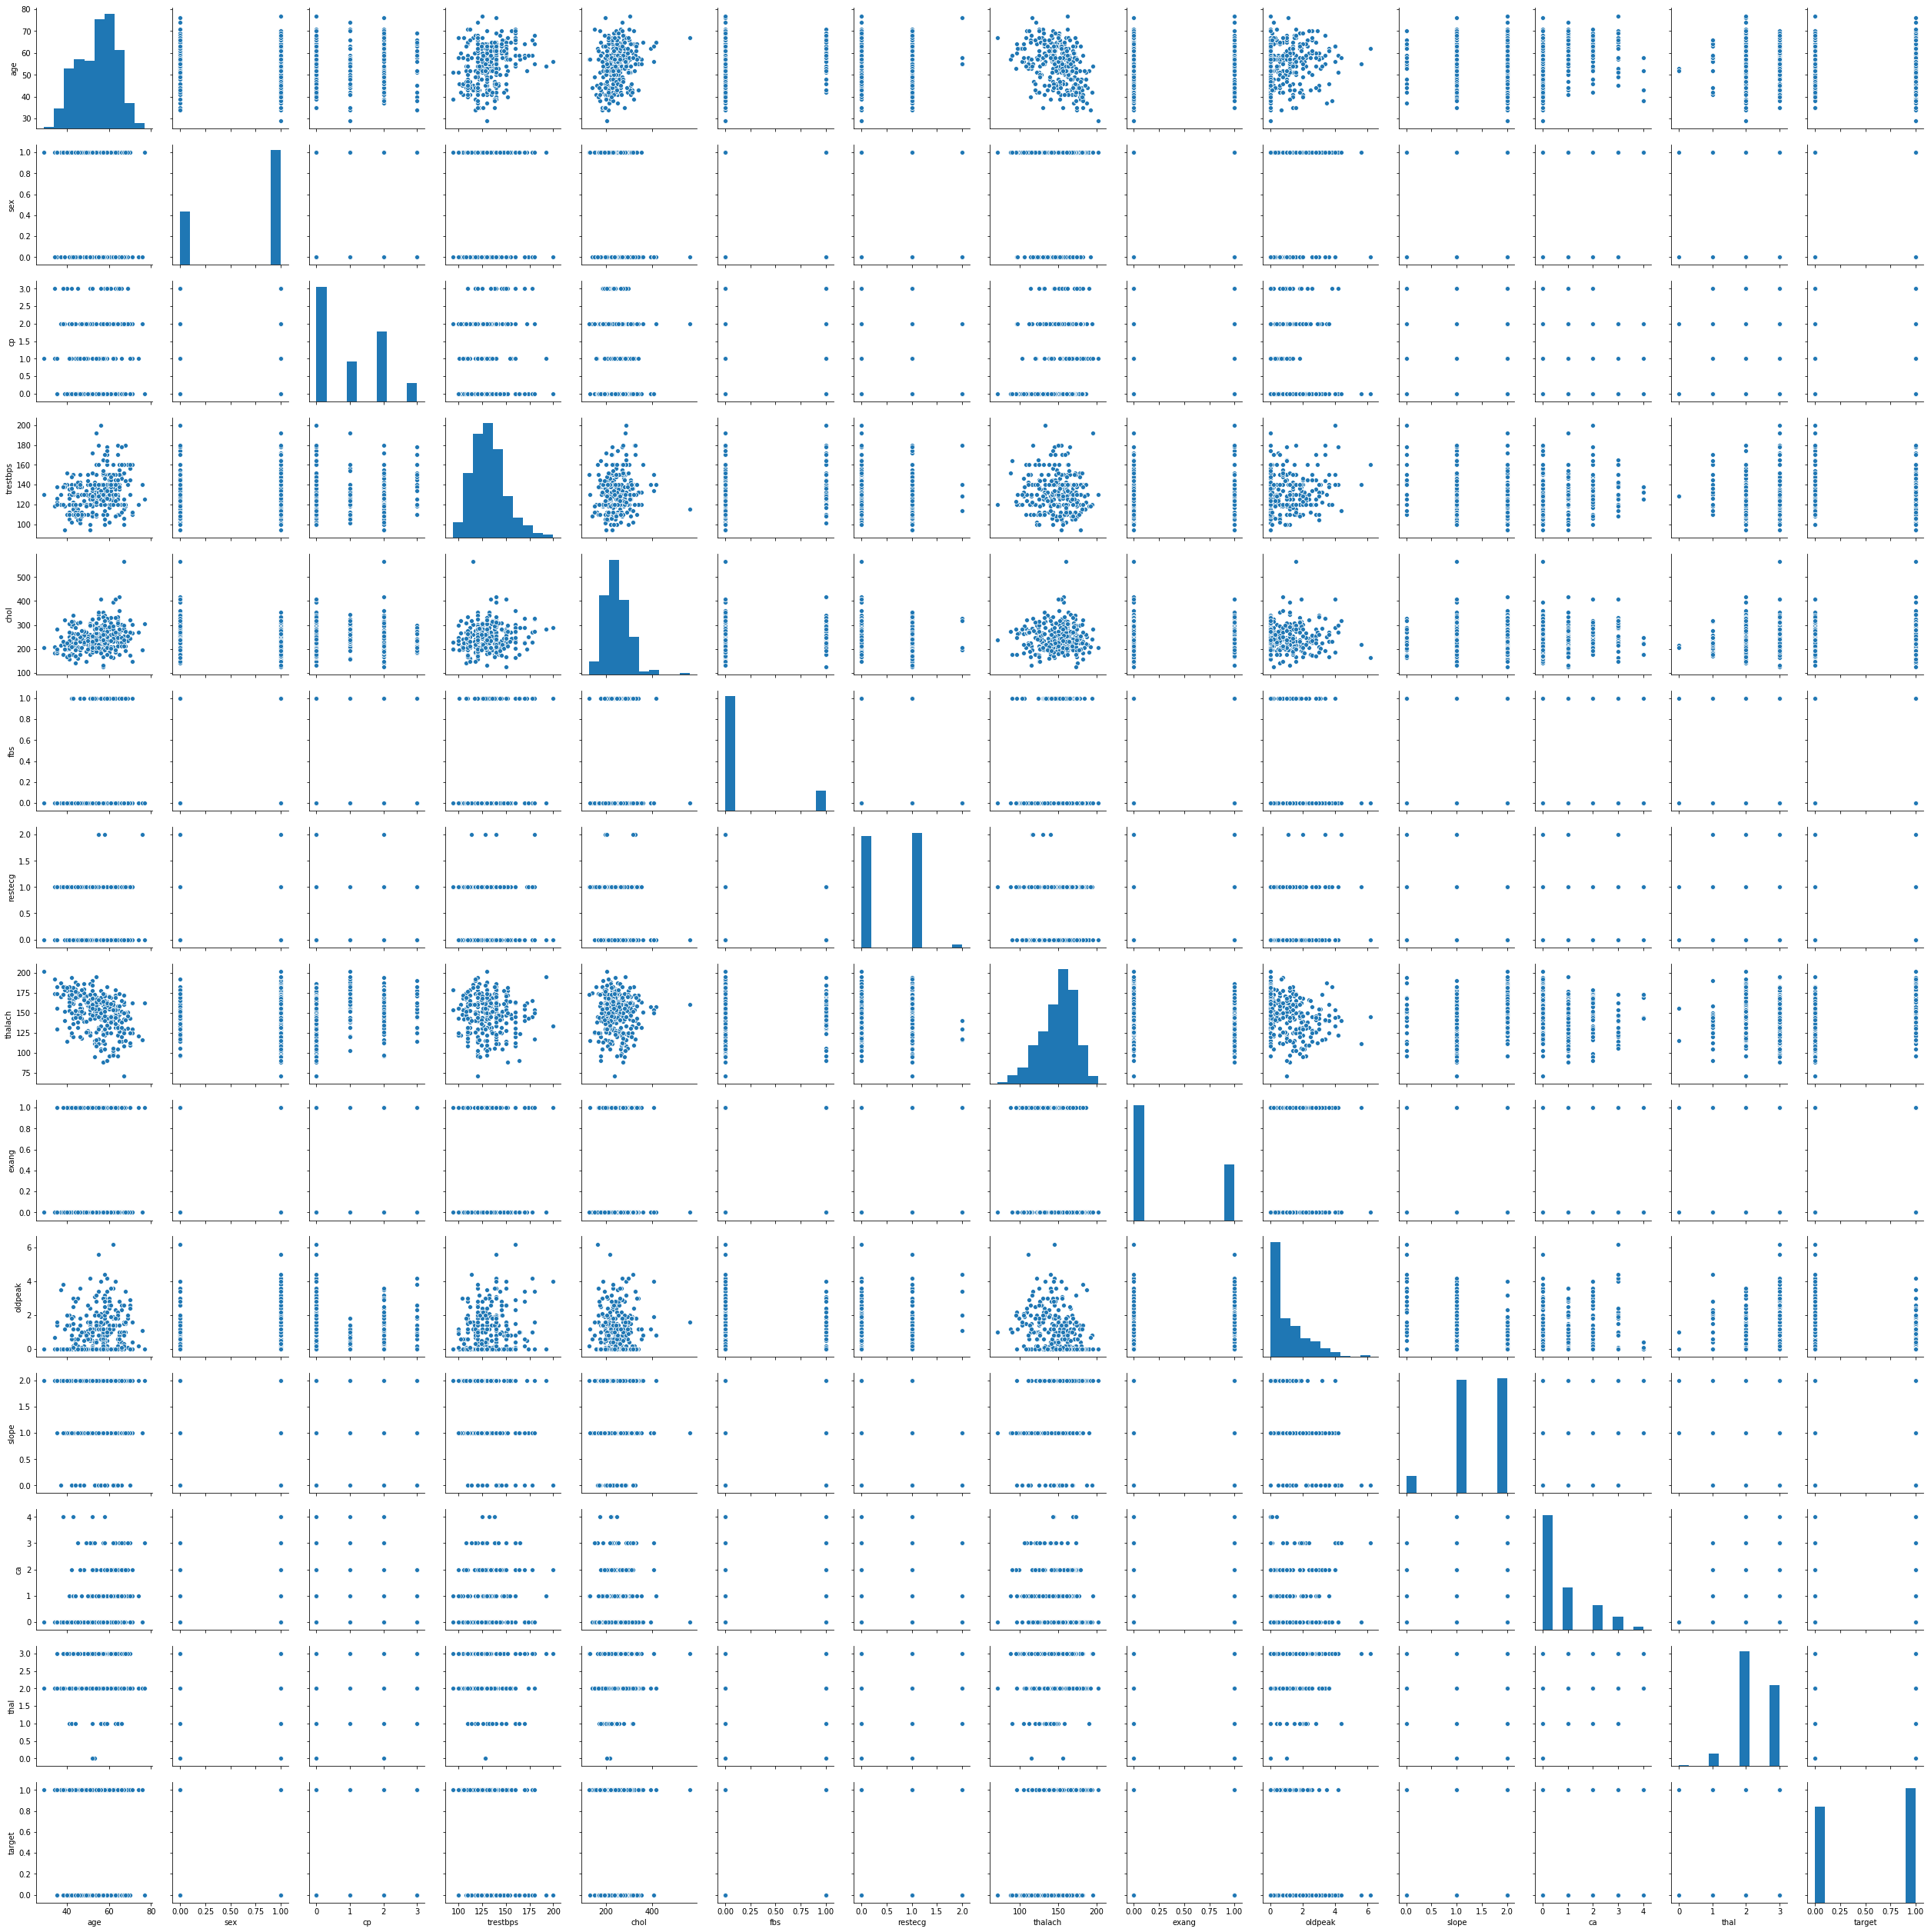

In [17]:
sns.pairplot(data)

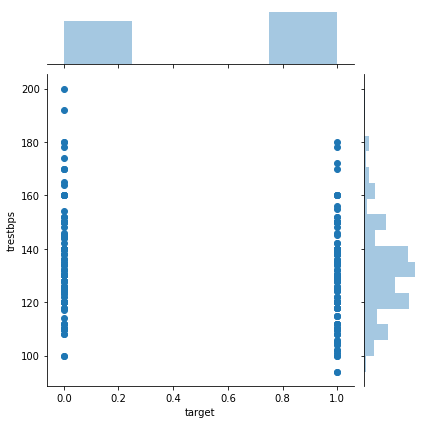

In [20]:
sns.jointplot(x = 'target', y = data.columns[3], data = data)

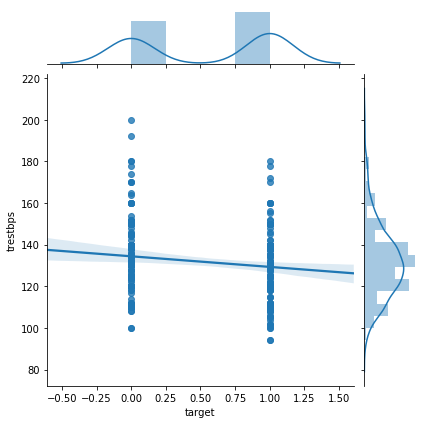

In [21]:
sns.jointplot(x = 'target', y = data.columns[3], data = data, kind = 'reg')

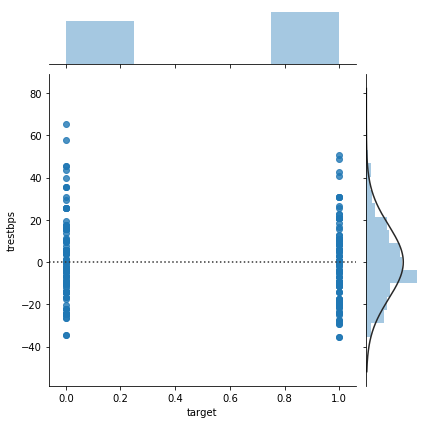

In [22]:
sns.jointplot(x = 'target', y = data.columns[3], data = data, kind = 'resid')

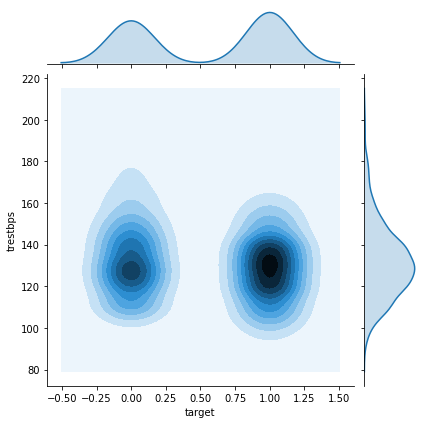

In [23]:
sns.jointplot(x = 'target', y = data.columns[3], data = data, kind = 'kde')

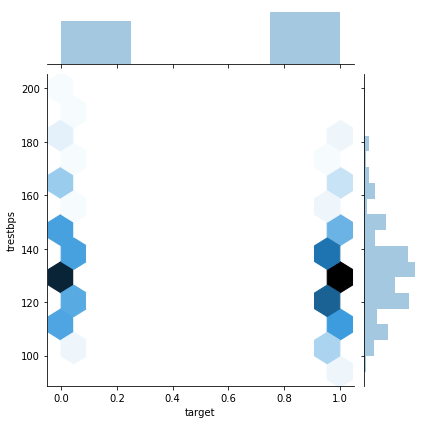

In [24]:
sns.jointplot(x = 'target', y = data.columns[3], data = data, kind = 'hex')

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1203: Runtim

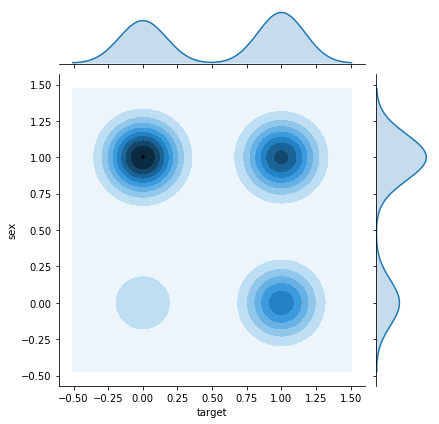

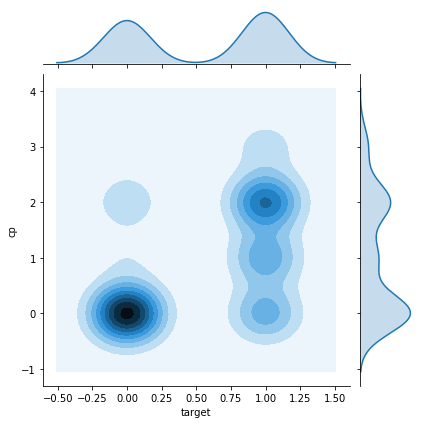

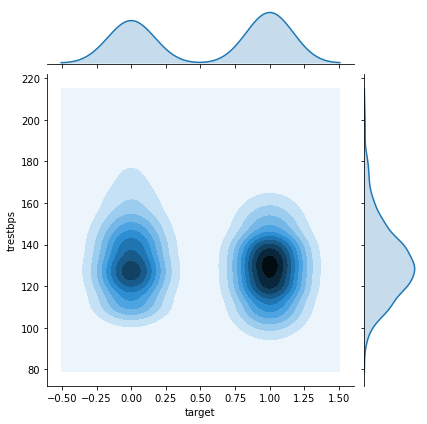

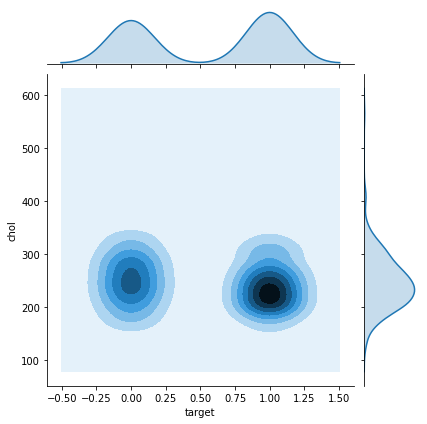

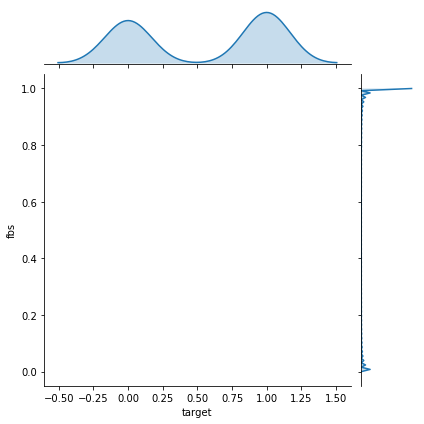

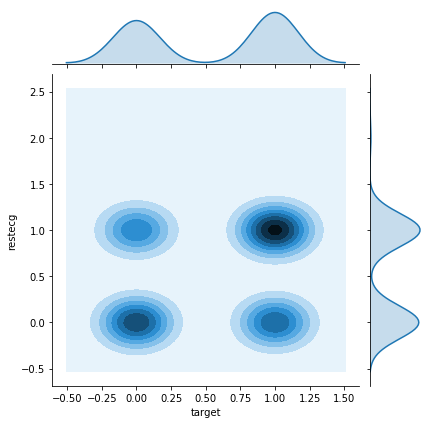

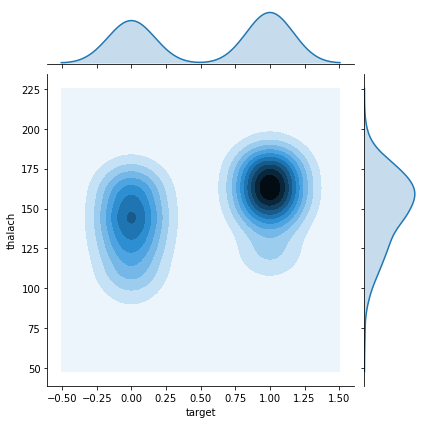

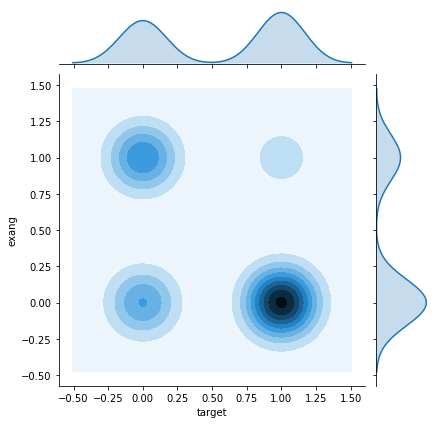

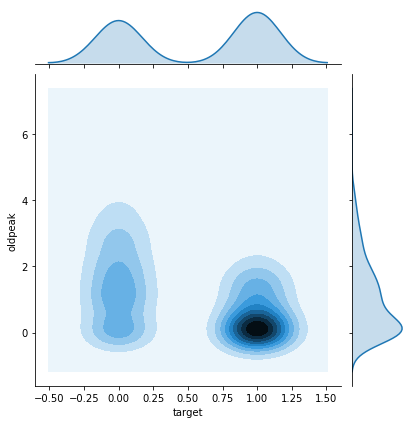

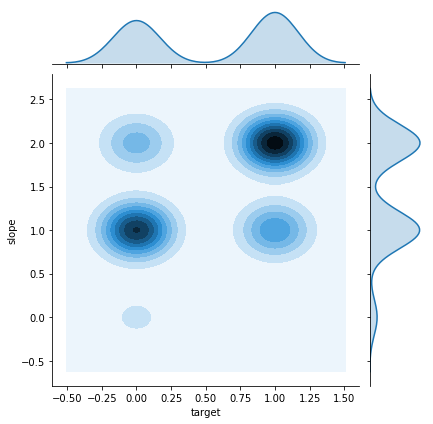

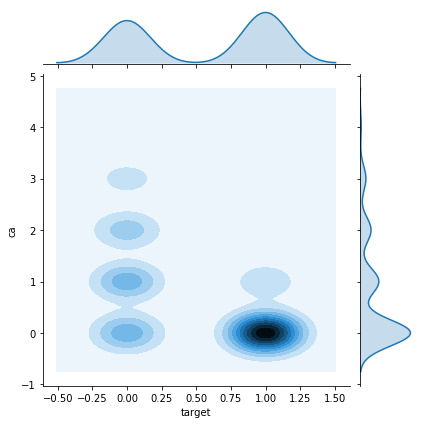

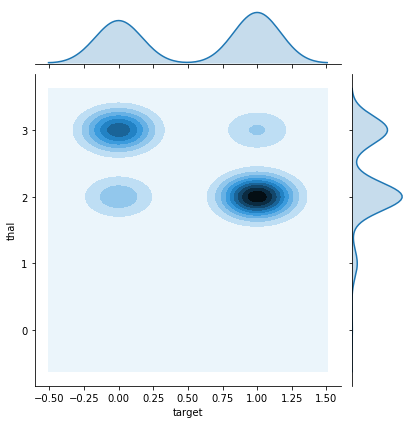

In [259]:
[sns.jointplot(x = 'target', y = y, data = data, kind = 'kde') for y in data.columns[1:13]]

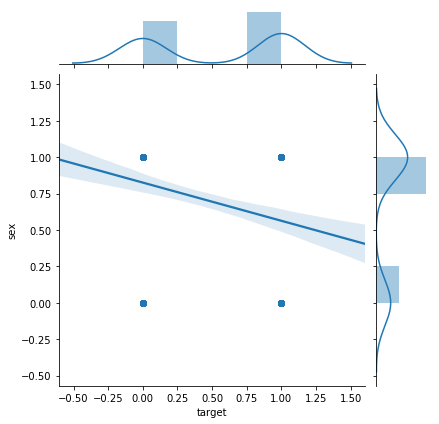

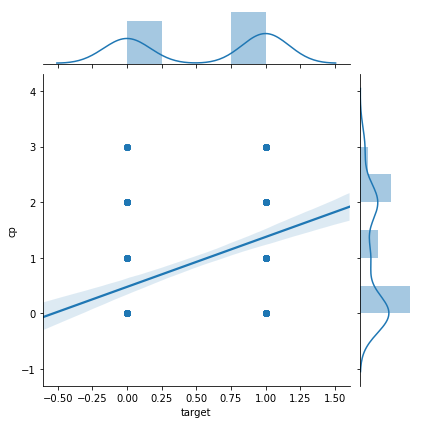

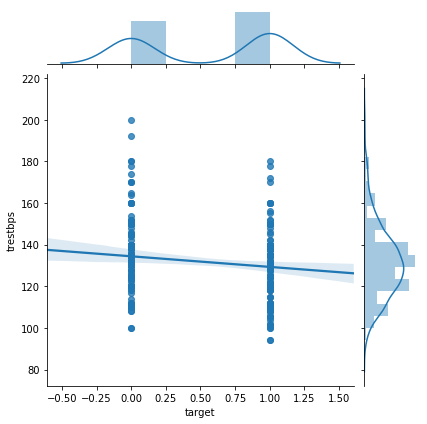

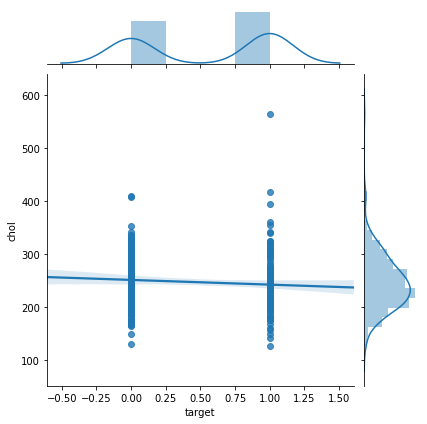

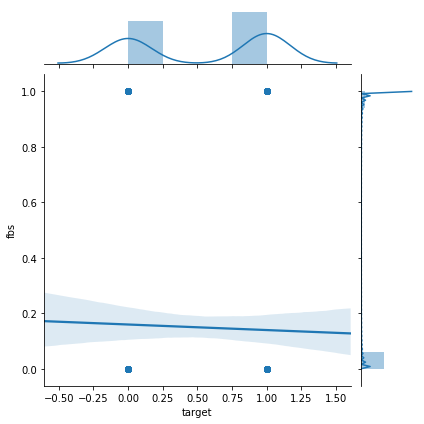

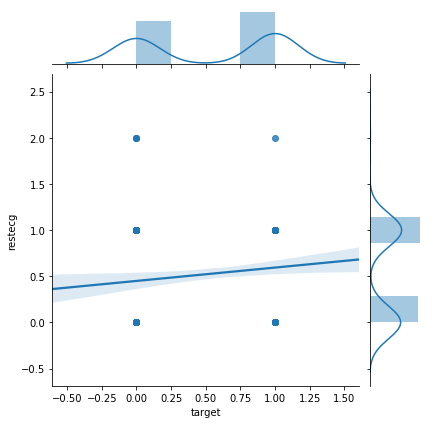

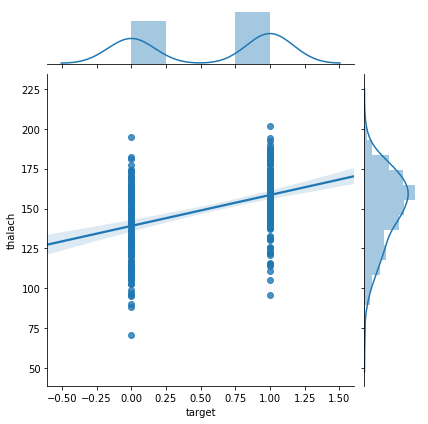

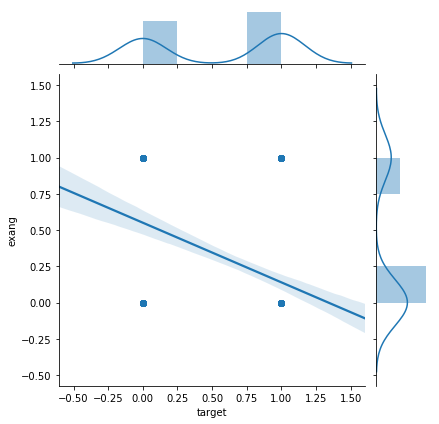

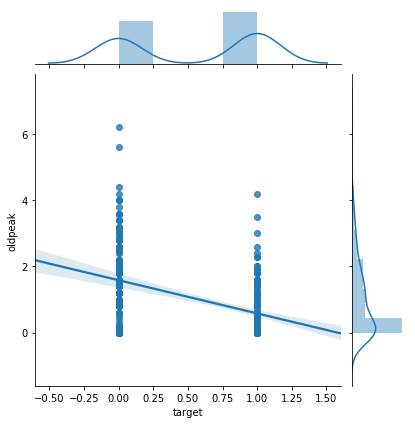

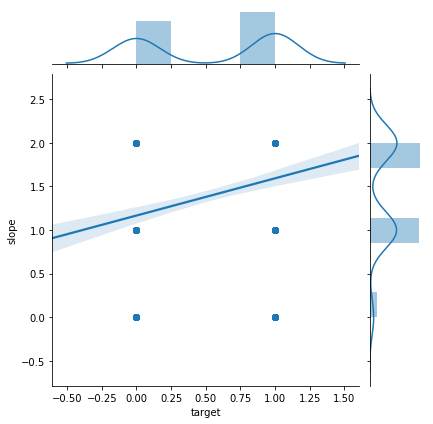

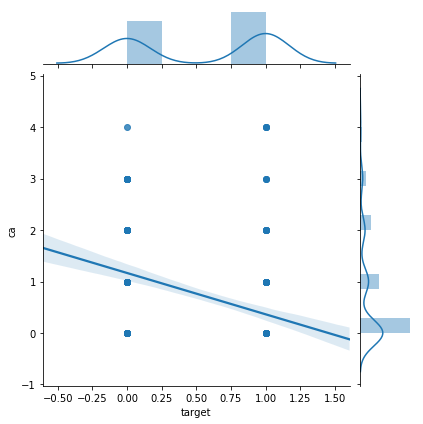

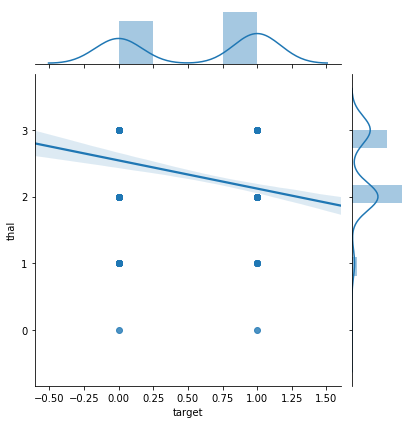

In [30]:
[sns.jointplot(x = 'target', y = y, data = data, kind = 'reg') for y in data.columns[1:13]]

In [33]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Normalize 



In [148]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [160]:
cat_transform = preprocessing.OneHotEncoder(categories = 'auto', sparse = False)
cat_transform2 = preprocessing.MultiLabelBinarizer()
num_transform = preprocessing.StandardScaler()

In [163]:
preprocess = ColumnTransformer(transformers=[('cat', cat_transform2, categorical),
                                             ('num', num_transform, numerical)])

In [164]:
processed_data = preprocess.fit_transform(data)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [157]:
processed_data[]

array([ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.29046364,  0.47839125, -1.04867848,
       -0.07201822, -0.55178349])

## Normalize continuous data (z-score) and one hot encode categorical 

In [216]:
#LB = preprocessing.LabelBinarizer()
SS = preprocessing.StandardScaler()
OH = preprocessing.OneHotEncoder(categories = 'auto', sparse=False)
mapper = DataFrameMapper([(['age'], SS), (['sex'], OH), (['cp'], OH), (['trestbps'], SS), (['chol'], SS),
                          (['fbs'], OH), (['restecg'], OH), (['thalach'], SS), (['exang'], OH), (['oldpeak'], SS),
                          (['slope'], OH),(['ca'], OH), (['thal'], OH), (['target'], OH)], df_out=True)

In [217]:
norm_data = mapper.fit_transform(data)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

## Encountered the Curse of Dimensionality

In [218]:
norm_data.shape

(303, 32)

In [219]:
norm_data.columns

Index(['age', 'sex_x0_0', 'sex_x0_1', 'cp_x0_0', 'cp_x0_1', 'cp_x0_2',
       'cp_x0_3', 'trestbps', 'chol', 'fbs_x0_0', 'fbs_x0_1', 'restecg_x0_0',
       'restecg_x0_1', 'restecg_x0_2', 'thalach', 'exang_x0_0', 'exang_x0_1',
       'oldpeak', 'slope_x0_0', 'slope_x0_1', 'slope_x0_2', 'ca_x0_0',
       'ca_x0_1', 'ca_x0_2', 'ca_x0_3', 'ca_x0_4', 'thal_x0_0', 'thal_x0_1',
       'thal_x0_2', 'thal_x0_3', 'target_x0_0', 'target_x0_1'],
      dtype='object')

In [220]:
norm_corr = norm_data.corr()

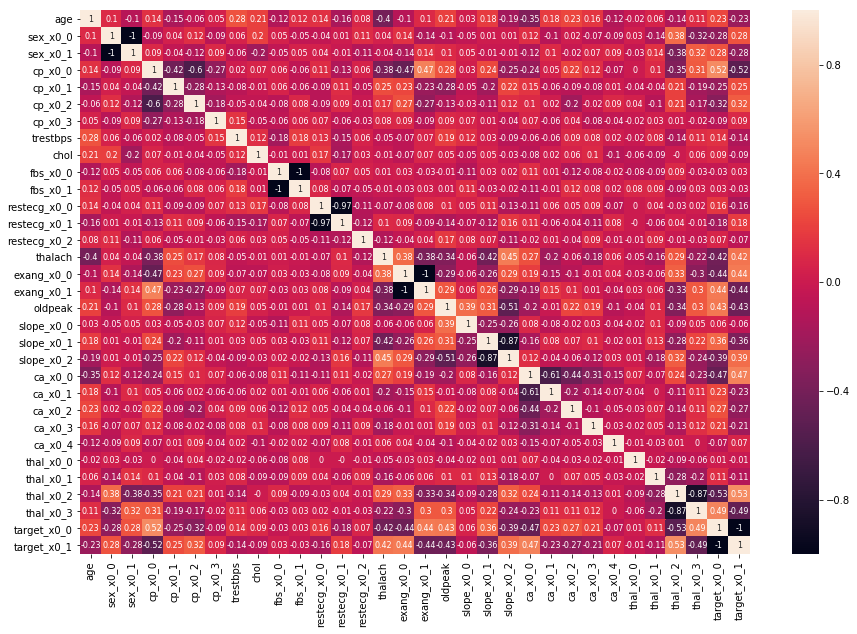

In [221]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(round(norm_corr, 2), annot=True, annot_kws = {'size' : 8});

In [222]:
norm_data.head()

,age,sex_x0_0,sex_x0_1,cp_x0_0,cp_x0_1,cp_x0_2,cp_x0_3,trestbps,chol,fbs_x0_0,...,ca_x0_1,ca_x0_2,ca_x0_3,ca_x0_4,thal_x0_0,thal_x0_1,thal_x0_2,thal_x0_3,target_x0_0,target_x0_1
0,0.952197,0.0,1.0,0.0,0.0,0.0,1.0,0.763956,-0.256334,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.915313,0.0,1.0,0.0,0.0,1.0,0.0,-0.092738,0.072199,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.474158,1.0,0.0,0.0,1.0,0.0,0.0,-0.092738,-0.816773,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.180175,0.0,1.0,0.0,1.0,0.0,0.0,-0.663867,-0.198357,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.290464,1.0,0.0,1.0,0.0,0.0,0.0,-0.663867,2.082050,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [223]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
